                  f1        f2        f3
date                                    
2024-02-16  0.026540 -0.023290 -0.007535
2024-02-20 -0.065456  0.024176 -0.003841
2024-02-21  0.037526 -0.050495  0.006866
2024-02-22  0.029717  0.004113  0.009987
2024-02-23 -0.005799  0.001001 -0.009956
...              ...       ...       ...
2025-02-10 -0.091823  0.023951  0.001261
2025-02-11 -0.019917 -0.016123  0.023810
2025-02-12  0.019276 -0.004510  0.018048
2025-02-13 -0.030898  0.033148  0.018199
2025-02-14 -0.025367  0.070819  0.008120

[250 rows x 3 columns]
              f1        f2        f3
symbol                              
AAPL    0.032804  0.076981  0.996493
SOFI    0.096988  0.992079 -0.079833
TUYA    0.994745 -0.099267 -0.025078


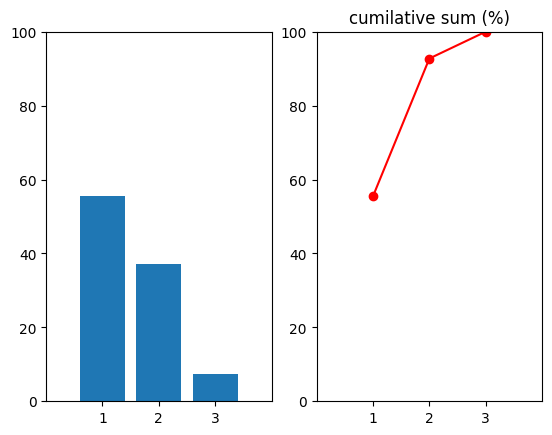

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from openbb import obb

obb.user.preferences.output_type = 'dataframe'
data = obb.equity.price.historical(
    ['SOFI', 'TUYA', 'AAPL'],
    provider='yfinance'
).pivot(columns='symbol', values='close')

returns = data.pct_change(fill_method=None).dropna()
pca = PCA(n_components=3)
pca.fit(returns)

pct = pca.explained_variance_ratio_
pca_components = pca.components_

cum_sum = np.cumsum(pct)
ax = np.arange(1, len(pct) + 1, 1) # returns evenly spaced values within a given interval
plt.subplot(1, 2, 1) # adds axes to the current figure or retrieve an existing axes
plt.bar(ax, pct * 100, align='center')
plt.xticks(ax)
plt.xlim([0, 4])
plt.ylim([0, 100])
plt.subplot(1, 2, 2)
plt.plot(ax, cum_sum * 100, 'ro-')
plt.title('cumilative sum (%)')
plt.xticks(ax)
plt.xlim([0, 4])
plt.ylim([0, 100])

x = np.asarray(returns)
factors_return = x.dot(pca_components.T)
factors_return = pd.DataFrame(
    columns=['f1', 'f2', 'f3'],
    index=returns.index,
    data=factors_return
)
factors_exposure = pd.DataFrame(
    index=['f1', 'f2', 'f3'],
    columns=returns.columns,
    data=pca_components
).T
print(factors_return)
print(factors_exposure)